# Mg II profiles in a polar CH from IRIS$^2$ RMAs

Alberto sent me 10 representative model atmospheres for quiet Sun close to disk center. I synthesized Mg II spectra in these atmospheres, with very weak magnetic fields, in a polar observing geometry. 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import glob
import os.path
sys.path.append('/glade/u/home/rce/hanlert/python/')
import readstokes as rs

# and some styling
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [60]:
hanlert_output = '/glade/u/home/rce/MgII/CH_case/hanleRT_output/'

RP0_dirs = glob.glob(hanlert_output + 'RMA_0_*')
RP0_dirs.sort()

RP_B10_dirs = glob.glob(hanlert_output + 'RMA_*_B_010')
RP_B10_dirs.sort()

In [61]:
# Wavelengths of interest

lam0 = 2796.35

LOS = ['Stokes_1_1', 'Stokes_2_1', 'Stokes_3_1', 'Stokes_6_1']
LOSind = 1

# Normalization flag

#normaliz_flag = 1 ## normalize to continuum intensity
normaliz_flag = 2 ## Normalize to I

fs = 18

# Wavelength range for plotting
DL = 1 ## in angstroms (+/- from line center)

# Mg II k profiles from the first RMA for various field strengths

/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_000/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_005/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_020/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_040/Stokes_2_1

*** LOS mu =  0.2999999999999997



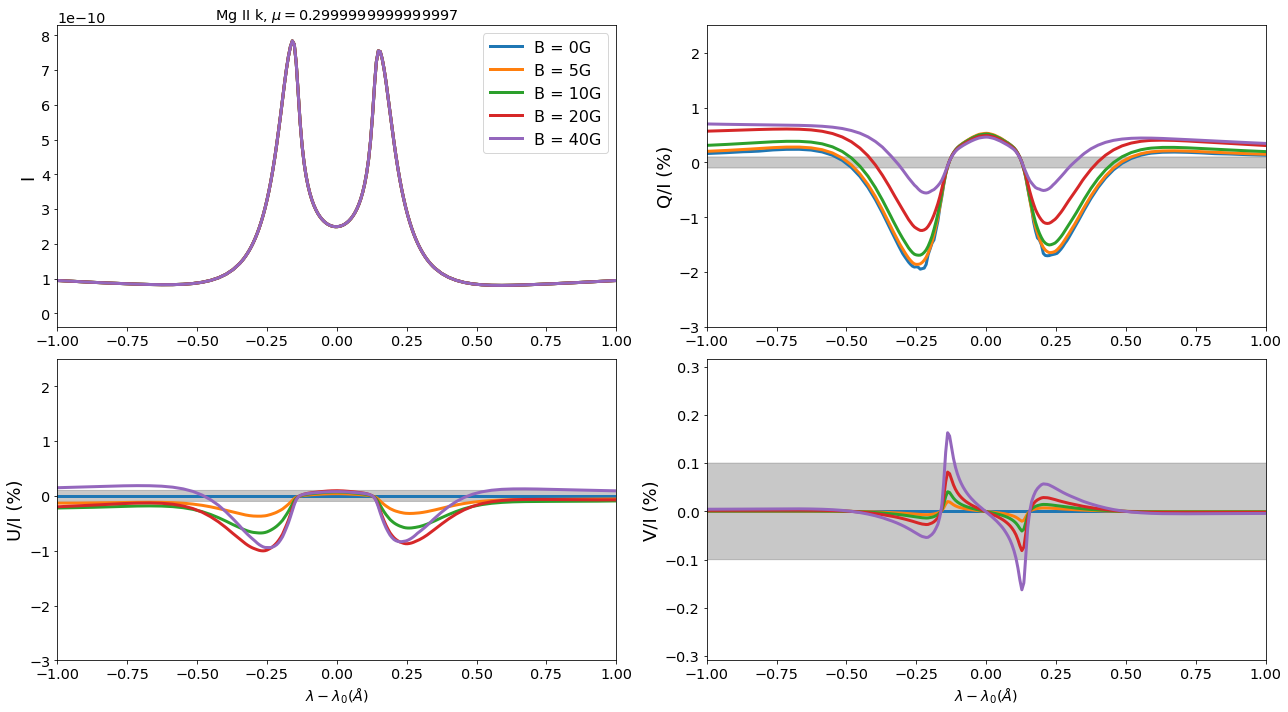

In [62]:
fig, ax = plt.subplots(2,2, figsize = (18,10))


for jj in range(len(RP0_dirs)):
    Bvalue = int(RP0_dirs[jj][-3:])
    print(RP0_dirs[jj] + '/'+str(LOS[LOSind]))
    stokes = rs.readstk(RP0_dirs[jj] +'/'+ str(LOS[LOSind]))
    I = stokes['I']
    Q = stokes['Q']
    U = stokes['U']
    V = stokes['V']
    lam = stokes['L']*10
    
    mu = stokes['mu']
    
    Ic = max(I)  # Define the continuum intensity locally
    
    if normaliz_flag == 1:
        ax[0,0].plot(lam-lam0, I/Ic, label = 'B = '+str(Bvalue) + 'G', linewidth = 3)
        ax[0,1].plot(lam-lam0, Q/Ic, linewidth = 3)
        ax[1,0].plot(lam-lam0, U/Ic, linewidth = 3)
        ax[1,1].plot(lam-lam0, V/Ic, linewidth = 3)
        ax[0,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
        ax[1,0].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
        ax[1,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)

        ax[0,0].set_ylabel('I/Ic', fontsize = fs)
        ax[0,1].set_ylabel('Q/Ic', fontsize = fs)
        ax[1,0].set_ylabel('U/Ic', fontsize = fs)
        ax[1,1].set_ylabel('V/Ic', fontsize = fs)
        ax[0,1].set_ylim(-0.02, 0.02)
        ax[1,0].set_ylim(-0.01, 0.01)
    else:
        ax[0,0].plot(lam-lam0, I, linewidth = 3, label = 'B = '+str(Bvalue) + 'G')
        ax[0,1].plot(lam-lam0, Q/I*100, linewidth = 3)
        ax[1,0].plot(lam-lam0, U/I*100, linewidth = 3)
        ax[1,1].plot(lam-lam0, V/I*100, linewidth = 3)
        ax[0,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
        ax[1,0].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
        ax[1,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)

        ax[0,0].set_ylabel('I', fontsize = fs)
        ax[0,1].set_ylabel('Q/I (%)', fontsize = fs)
        ax[1,0].set_ylabel('U/I (%)', fontsize = fs)
        ax[1,1].set_ylabel('V/I (%)', fontsize = fs)
        ax[0,1].set_ylim(-3, 2.5)
        ax[1,0].set_ylim(-3, 2.5)

ax[0,0].set_title(r'Mg II k, $\mu = $'+ str(mu))
    
for kk in range(2):
    ax[1,kk].set_xlabel(r'$\lambda-\lambda_0 (\AA)$')
    for jj in range(2):
        ax[jj,kk].set_xlim(-DL, DL)


handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles, labels, fontsize = 16, loc = 'upper right')

plt.tight_layout()
print()
print('*** LOS mu = ', mu)
print()

# RPs from different RMAs for a magnetic field of 10 G inclined 10 degrees.

/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_0_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_1_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_2_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_3_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_4_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_5_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_6_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_7_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_8_B_010/Stokes_2_1
/glade/u/home/rce/MgII/CH_case/hanleRT_output/RMA_9_B_010/Stokes_2_1

*** LOS mu =  0.2999999999999997



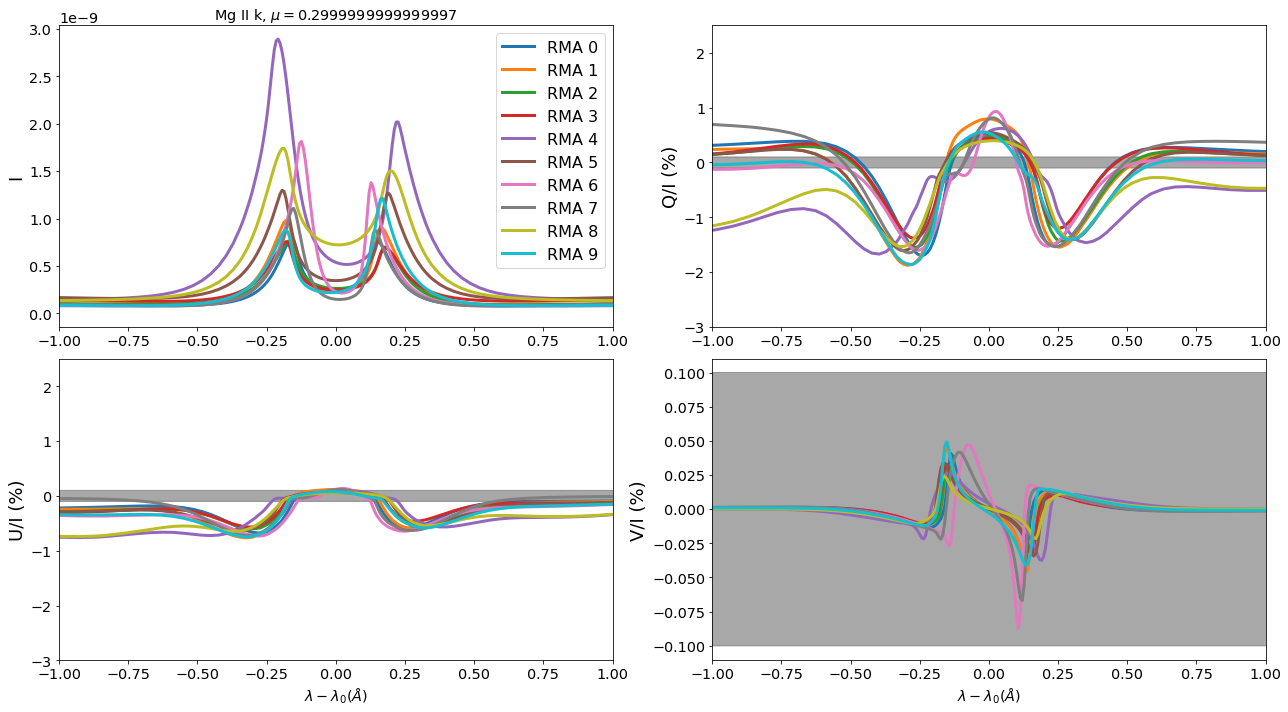

In [63]:
fig, ax = plt.subplots(2,2, figsize = (18,10))


for jj in range(len(RP_B10_dirs)):
    Bvalue = int(RP_B10_dirs[jj][-3:])
    print(RP_B10_dirs[jj] + '/'+str(LOS[LOSind]))
    stokes = rs.readstk(RP_B10_dirs[jj] +'/'+ str(LOS[LOSind]))
    I = stokes['I']
    Q = stokes['Q']
    U = stokes['U']
    V = stokes['V']
    lam = stokes['L']*10
    
    mu = stokes['mu']
    
    Ic = max(I)  # Define the continuum intensity locally
    
    if normaliz_flag == 1:
        ax[0,0].plot(lam-lam0, I/Ic, label = 'RMA '+str(jj), linewidth = 3)
        ax[0,1].plot(lam-lam0, Q/Ic, linewidth = 3)
        ax[1,0].plot(lam-lam0, U/Ic, linewidth = 3)
        ax[1,1].plot(lam-lam0, V/Ic, linewidth = 3)
        ax[0,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
        ax[1,0].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
        ax[1,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)

        ax[0,0].set_ylabel('I/Ic', fontsize = fs)
        ax[0,1].set_ylabel('Q/Ic', fontsize = fs)
        ax[1,0].set_ylabel('U/Ic', fontsize = fs)
        ax[1,1].set_ylabel('V/Ic', fontsize = fs)
        ax[0,1].set_ylim(-0.02, 0.02)
        ax[1,0].set_ylim(-0.01, 0.01)
    else:
        ax[0,0].plot(lam-lam0, I, linewidth = 3, label = 'RMA '+str(jj))
        ax[0,1].plot(lam-lam0, Q/I*100, linewidth = 3)
        ax[1,0].plot(lam-lam0, U/I*100, linewidth = 3)
        ax[1,1].plot(lam-lam0, V/I*100, linewidth = 3)
        ax[0,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
        ax[1,0].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
        ax[1,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)

        ax[0,0].set_ylabel('I', fontsize = fs)
        ax[0,1].set_ylabel('Q/I (%)', fontsize = fs)
        ax[1,0].set_ylabel('U/I (%)', fontsize = fs)
        ax[1,1].set_ylabel('V/I (%)', fontsize = fs)
        ax[0,1].set_ylim(-3, 2.5)
        ax[1,0].set_ylim(-3, 2.5)
ax[0,0].set_title(r'Mg II k, $\mu = $'+ str(mu))
    
    
for kk in range(2):
    ax[1,kk].set_xlabel(r'$\lambda-\lambda_0 (\AA)$')
    for jj in range(2):
        ax[jj,kk].set_xlim(-DL, DL)


handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles, labels, fontsize = 16, loc = 'upper right')

plt.tight_layout()
print()
print('*** LOS mu = ', mu)
print()


*** LOS mu =  0.2999999999999997



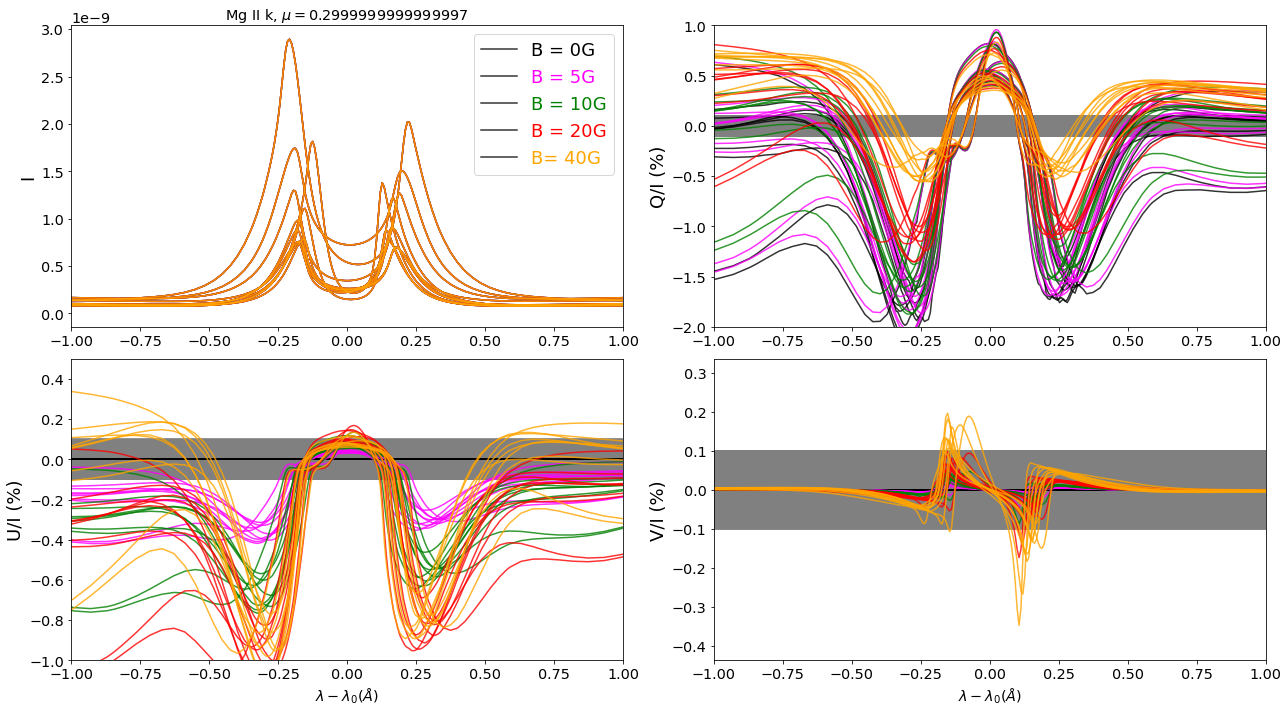

In [64]:
alp = 0.8 # transparency value for plots
colors = ['black','magenta', 'green', 'red','orange'] #colors for magnetic fields
lw = 1.5

RP_B_dirs = glob.glob(hanlert_output + 'RMA_*_B_*')
RP_B_dirs.sort()

RP_B_dirs = np.reshape(RP_B_dirs, (10,5))
Bvals = [0,5,10,20,40]
fig, ax = plt.subplots(2,2, figsize = (18,10))

for jj in range(5): # five different magnetic field values
    for kk in range(10):
        Bvalue = Bvals[jj]
        #print(RP_B10_dirs[jj] + '/'+str(LOS[LOSind]))
        stokes = rs.readstk(RP_B_dirs[kk][jj] +'/'+ str(LOS[LOSind]))
        I = stokes['I']
        Q = stokes['Q']
        U = stokes['U']
        V = stokes['V']
        lam = stokes['L']*10
    
        mu = stokes['mu']
    
        Ic = max(I)  # Define the continuum intensity locally
    
        if normaliz_flag == 1:
            ax[0,0].plot(lam-lam0, I/Ic, linewidth = lw, color = colors[jj], alpha = alp)
            ax[0,1].plot(lam-lam0, Q/Ic, linewidth = lw, color = colors[jj], alpha = alp)
            ax[1,0].plot(lam-lam0, U/Ic, linewidth = lw, color = colors[jj], alpha = alp)
            ax[1,1].plot(lam-lam0, V/Ic, linewidth = lw, color = colors[jj], alpha = alp)
            ax[0,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
            ax[1,0].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)
            ax[1,1].fill_between(lam-lam0,-1e-3, 1e-3, color = 'gray', alpha = 0.1)

            ax[0,0].set_ylabel('I/Ic', fontsize = fs)
            ax[0,1].set_ylabel('Q/Ic', fontsize = fs)
            ax[1,0].set_ylabel('U/Ic', fontsize = fs)
            ax[1,1].set_ylabel('V/Ic', fontsize = fs)
            ax[0,1].set_ylim(-0.02, 0.02)
            ax[1,0].set_ylim(-0.01, 0.01)
        else:
            ax[0,0].plot(lam-lam0, I, linewidth = lw, color = colors[jj], alpha = alp)
            ax[0,1].plot(lam-lam0, Q/I*100, linewidth = lw, color = colors[jj], alpha = alp)
            ax[1,0].plot(lam-lam0, U/I*100, linewidth = lw, color = colors[jj], alpha = alp)
            ax[1,1].plot(lam-lam0, V/I*100, linewidth = lw, color = colors[jj], alpha = alp)
            ax[0,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
            ax[1,0].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)
            ax[1,1].fill_between(lam-lam0,-1e-1, 1e-1, color = 'gray', alpha = 0.1)

            ax[0,0].set_ylabel('I', fontsize = fs)
            ax[0,1].set_ylabel('Q/I (%)', fontsize = fs)
            ax[1,0].set_ylabel('U/I (%)', fontsize = fs)
            ax[1,1].set_ylabel('V/I (%)', fontsize = fs)
            ax[0,1].set_ylim(-2, 1)
            ax[1,0].set_ylim(-1, 0.5)
    
ax[0,0].set_title(r'Mg II k, $\mu = $'+ str(mu))
    
    
for kk in range(2):
    ax[1,kk].set_xlabel(r'$\lambda-\lambda_0 (\AA)$')
    for jj in range(2):
        ax[jj,kk].set_xlim(-DL, DL)

ax[0,0].legend(['B = 0G', 'B = 5G', 'B = 10G', 'B = 20G', 'B= 40G'], labelcolor = colors, fontsize = fs)

#handles, labels = ax[0,0].get_legend_handles_labels()
#ax[0,0].legend(handles, labels, fontsize = 16, loc = 'upper right')

plt.tight_layout()
print()
print('*** LOS mu = ', mu)
print()